In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [13]:
directory = '/content/Fish_Dataset/Fish_Dataset'

In [14]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))
['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
9
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]
File=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        File+=[file]
        print(file)

['Red Mullet', 'Sea Bass', 'Striped Red Mullet', 'Hourse Mackerel', 'Trout', 'Black Sea Sprat', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
9
Red Mullet
Sea Bass
Striped Red Mullet
Hourse Mackerel
Trout
Black Sea Sprat
Shrimp
Gilt-Head Bream
Red Sea Bream


In [15]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<=800:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [16]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [17]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [18]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [19]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [20]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(5767, 100, 100, 3)
(1442, 100, 100, 3)
(5767, 9)
(1442, 9)


In [21]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(9, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

74850304/74836368 [==============================] - 2s 0us/step
Epoch 1/20
181/181 [==============================] - 46s 134ms/step - loss: 0.6516 - accuracy: 0.7734 - val_loss: 0.2619 - val_accuracy: 0.9071
Epoch 2/20
181/181 [==============================] - 20s 111ms/step - loss: 0.2738 - accuracy: 0.9038 - val_loss: 0.2465 - val_accuracy: 0.9064
Epoch 3/20
181/181 [==============================] - 19s 105ms/step - loss: 0.2160 - accuracy: 0.9208 - val_loss: 0.1060 - val_accuracy: 0.9653
Epoch 4/20
181/181 [==============================] - 19s 103ms/step - loss: 0.1720 - accuracy: 0.9398 - val_loss: 0.1459 - val_accuracy: 0.9445
Epoch 5/20
181/181 [==============================] - 18s 102ms/step - loss: 0.1670 - accuracy: 0.9404 - val_loss: 0.0864 - val_accuracy: 0.9660
Epoch 6/20
181/181 [==============================] - 19s 106ms/step - loss: 0.1463 - accuracy: 0.9456 - val_loss: 0.2525 - val_accuracy: 0.9223
Epoch 7/20
181/181 [==============================] - 21s 114ms/s

In [22]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       134
           1       0.99      0.98      0.98       161
           2       0.98      0.96      0.97       169
           3       0.99      1.00      1.00       170
           4       0.99      0.99      0.99       163
           5       0.99      0.98      0.99       172
           6       0.96      1.00      0.98       138
           7       0.98      0.98      0.98       168
           8       0.98      0.99      0.99       167

    accuracy                           0.98      1442
   macro avg       0.98      0.99      0.98      1442
weighted avg       0.98      0.98      0.98      1442



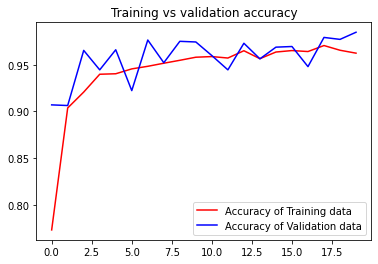

<Figure size 432x288 with 0 Axes>

In [23]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

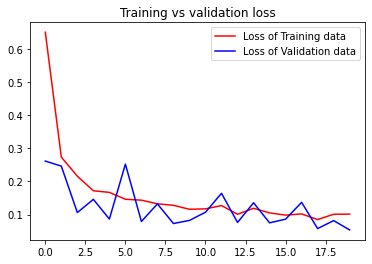

<Figure size 432x288 with 0 Axes>

In [24]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [26]:
image = load_img("/content/Fish_Dataset/Fish_Dataset/Red Mullet/Red Mullet/00003.png",target_size=(100,100))

In [27]:
image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [28]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is Red Mullet.


In [29]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

(1791, 100, 100, 3)
(1791, 9)


In [30]:
PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

In [31]:
ANS=tlabels0
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9821328866554997
